### Importação das bibliotecas necessárias

In [2]:
import numpy as np 
from skimage import filters 
from skimage import io
from skimage import measure
import matplotlib.pyplot as plt
import cv2
import time

## Conversão de imagem RGB para escala de cinza
Utilizamos a mesma fórmula fornecida no primeiro trabalho, que pode ser implementada de maneira fácil e eficiente utilizando o numpy.

In [3]:
# Executar essa célula antes da célula seguinte
def rbg_to_gray(img):
    copy = np.dot(img[:,:,:], [0.2989, 0.5870, 0.1140])
    return copy

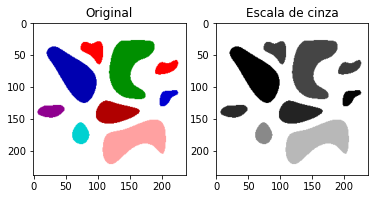

Tempo para processar a imagem: 0.004s


In [4]:
img_name = 'objetos3.png'
img = io.imread('in/' + img_name)

if img is None:
    sys.exit("Could not read the image.")

start = time.time()
copy = rbg_to_gray(img)
end = time.time()

f, axarr = plt.subplots(1,2, figsize = (6,6))
axarr[0].imshow(img)
axarr[0].set_title("Original")

axarr[1].imshow(copy, cmap = 'gray')
axarr[1].set_title("Escala de cinza")
plt.show()

print("Tempo para processar a imagem: %.3fs" %(end - start))

if not cv2.imwrite('out/gray.png', copy):
    print("Falha ao salvar a imagem")

## Conversão da imagem RGB para monocromática
Para melhorar o desempenho de alguns algoritmos utilizados a seguir, a imagem utilizada deve ser monocromática, com background em preto e foreground branco.

In [5]:
# Executar essa célula antes da célula seguinte
def rbg_to_binary(img):
    copy = img.copy()
    copy[np.any(copy < 255, axis= 2)] = 0
    copy[copy == 255] = 1
    return 1 - copy[:, :,0]

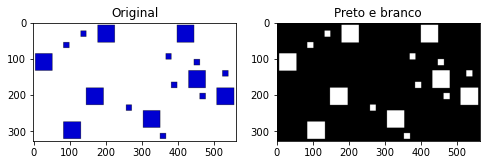

Tempo para processar a imagem: 0.007s


In [6]:
img_name = 'objetos1.png'
img = io.imread('in/' + img_name)

if img is None:
    sys.exit("Could not read the image.")

start = time.time()
copy = rbg_to_binary(img)
end = time.time()

f, axarr = plt.subplots(1,2, figsize = (8,8))
axarr[0].imshow(img)
axarr[0].set_title("Original")

axarr[1].imshow(copy * 255, cmap = 'gray')
axarr[1].set_title("Preto e branco")
plt.show()

print("Tempo para processar a imagem: %.3fs" %(end - start))

if not cv2.imwrite('out/mono_ex.png', copy * 255):
    print("Falha ao salvar a imagem")

## Detecção dos contornos usando a função findContours da biblioteca OpenCV.

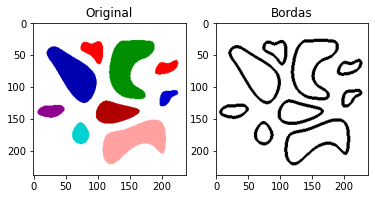

Tempo para processar a imagem: 0.022s


In [7]:
img_name = 'objetos3.png'
img = io.imread('in/' + img_name)

if img is None:
    sys.exit("Could not read the image.")

start = time.time()
copy = rbg_to_binary(img).astype(np.uint8)

contours, hierarchy = cv2.findContours(copy, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contour = np.ones(img.shape)
cv2.drawContours(contour, contours, -1, (0,0,0), 3)

end = time.time()

f, axarr = plt.subplots(1,2, figsize = (6,6))
axarr[0].imshow(img)
axarr[0].set_title("Original")

axarr[1].imshow(contour, cmap = 'gray')
axarr[1].set_title("Bordas")
plt.show()

print("Tempo para processar a imagem: %.3fs" %(end - start))

if not cv2.imwrite('out/contour.png', contour * 255):
    print("Falha ao salvar a imagem")

## Detecção dos contornos por Canny da biblioteca OpenCV.

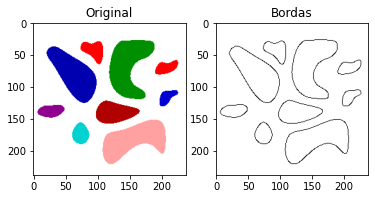

Tempo para processar a imagem: 0.004s


In [53]:
img_name = 'objetos3.png'
img = io.imread('in/' + img_name)

if img is None:
    sys.exit("Could not read the image.")

start = time.time()
copy = rbg_to_gray(img).astype(np.uint8)

edges = 255 - cv2.Canny(copy * 255, 100, 255)

end = time.time()

f, axarr = plt.subplots(1,2, figsize = (6,6))
axarr[0].imshow(img, cmap = 'gray')
axarr[0].set_title("Original")

axarr[1].imshow(edges, cmap = 'gray')
axarr[1].set_title("Bordas")
plt.show()

print("Tempo para processar a imagem: %.3fs" %(end - start))

if not cv2.imwrite('out/canny.png', edges):
    print("Falha ao salvar a imagem")

## Obtenção das propriedades dos objetos da imagem
A identificação de cada objeto será feita com a função connectedComponents, enquanto para a extração de suas propriedades a função regionprops_table será utilizada, ambas da biblioteca OpenCV.

Número de regiões: 9
Região: 1 área: 3969 perímetro: 313.765 excentricidade: 0.81636 solidez: 0.74774
Região: 2 área:  791 perímetro: 119.983 excentricidade: 0.74110 solidez: 0.89886
Região: 3 área: 3584 perímetro: 259.463 excentricidade: 0.89807 solidez: 0.97790
Região: 4 área:  540 perímetro:  99.255 excentricidade: 0.88959 solidez: 0.91062
Região: 5 área:  438 perímetro:  88.770 excentricidade: 0.85592 solidez: 0.91632
Região: 6 área: 1684 perímetro: 174.125 excentricidade: 0.86817 solidez: 0.97229
Região: 7 área:  642 perímetro: 103.012 excentricidade: 0.89024 solidez: 0.96979
Região: 8 área: 3934 perímetro: 305.421 excentricidade: 0.91099 solidez: 0.77426
Região: 9 área:  675 perímetro:  96.326 excentricidade: 0.62038 solidez: 0.97685


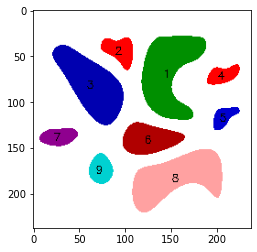

In [23]:
img_name = 'objetos3.png'
img = io.imread('in/' + img_name)

if img is None:
    sys.exit("Could not read the image.")

copy = rbg_to_binary(img)

# Labels é uma matriz com as mesmas dimensões da imagem, onde cada elemento tem valor igual ao identificador da região da qual o pixel correspondente pertence
numLabels, labels = cv2.connectedComponents(copy, 8, cv2.CV_32S)
props = measure.regionprops_table(labels, properties = ('centroid', 'area', 'perimeter', 'eccentricity', 'solidity'))

print('Número de regiões:', numLabels - 1)

for label in range(numLabels):
    # A label 0 corresponde ao background
    if label == 0:
        continue
    
    centroids = (props['centroid-0'][label - 1], props['centroid-1'][label - 1])
    cv2.putText(img, str(label), (int(centroids[1]) - 5, int(centroids[0]) + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, 0, 1)
    
    area = props['area'][label - 1]
    perimeter = props['perimeter'][label - 1]
    eccentricity = props['eccentricity'][label - 1]
    solidity = props['solidity'][label - 1]

    print("Região: {} área: {:>4} perímetro: {:>7.3f} excentricidade: {:.5f} solidez: {:.5f}".format(label, area, perimeter, eccentricity, solidity))

plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if not cv2.imwrite('out/labeled.png', img):
    print("Falha ao salvar a imagem")


## Construção do histograma de áreas
A extração das áreas dos objetos da imagem é feita na célula anterior, então execute-a antes dessa.

A altura do histograma é equivalente ao número de objetos em cada classificação de área, sendo pequenas para áreas menores que 1500 pixels, médias entre 1500 e 3000 pixels e grandes quando maiores ou iguais a 3000 pixels. 

Número de regiões pequenas: 5.0
Número de regiões médias: 1.0
Número de regiões grandes: 3.0


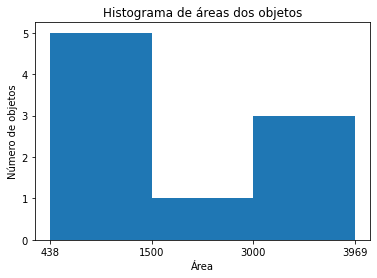

In [24]:
histogram = np.zeros(3).astype(np.int8)

areas = props['area'][:]
for area in areas:
    if area < 1500:
        histogram[0] += 1
    elif area < 3000:
        histogram[1] += 1
    else:
        histogram[2] += 1

print("Número de regiões pequenas:", histogram[0]))
print("Número de regiões médias:", int(histogram[1]))
print("Número de regiões grandes:", int(histogram[2]))

min = areas.min()
max = areas.max()

if min > 1500:
    min = 0
if max <= 3000:
    max = 3500

fig, ax = plt.subplots()
ax.bar([0.5, 1, 1.5], histogram, width = 0.5, align = 'edge')
ax.set_xticks([0.5, 1, 1.5, 2])
ax.set_xticklabels((min, '1500', '3000', max))
plt.title('Histograma de áreas dos objetos')
plt.ylabel('Número de objetos')
plt.xlabel('Área')
plt.savefig('out/histogram.png')
plt.show()

### Cálculo do perímetro pela soma dos pixels de borda obtidos por Canny

Número de regiões: 9
Região: 1 perímetro: 311
Região: 2 perímetro: 122
Região: 3 perímetro: 268
Região: 4 perímetro: 98
Região: 5 perímetro: 88
Região: 6 perímetro: 167
Região: 7 perímetro: 104
Região: 8 perímetro: 304
Região: 9 perímetro: 99


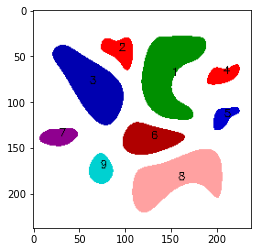

In [89]:
img_name = 'objetos3.png'
img = io.imread('in/' + img_name)

if img is None:
    sys.exit("Could not read the image.")

copy = rbg_to_binary(img)

edges = cv2.Canny(copy * 255, 100, 255)
numLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(edges, 8, cv2.CV_32S)

print('Número de regiões:', numLabels - 1)

for label in range(numLabels):
    # A label 0 corresponde ao background
    if label == 0:
        continue

    area = stats[label, cv2.CC_STAT_AREA]
    (x, y) = centroids[label]

    cv2.putText(img, str(label), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, 0, 1)

    print("Região: {} perímetro: {}".format(label, area))

plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

if not cv2.imwrite('out/labeled.png', img):
    print("Falha ao salvar a imagem")
